# 2. Consider only the below columns and prepare a prediction model for predicting Price.

## Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data=pd.read_csv('F:/ExcelR workings/Assignments/Multi Linear Regression/ToyotaCorolla.csv',encoding='unicode_escape')

In [3]:
Data=pd.DataFrame(data)

In [4]:
Data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
# There is no null values

In [7]:
Data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [8]:
#Required columns
Data1=Data.copy()

In [9]:
Data1=Data1[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
Data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [10]:
# Rename the column names
DATA=Data1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT','Weight':'WT'},axis=1)

In [11]:
DATA.shape

(1436, 9)

In [12]:
DATA.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


<AxesSubplot:>

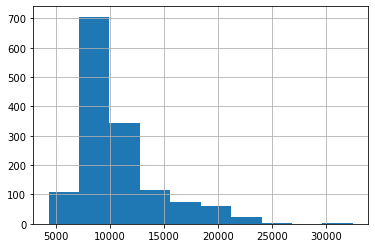

In [13]:
DATA['Price'].hist()

<AxesSubplot:>

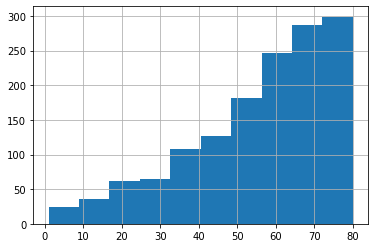

In [14]:
DATA['Age'].hist()

<AxesSubplot:>

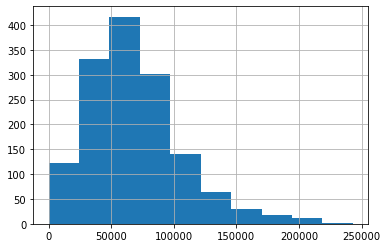

In [15]:
DATA['KM'].hist()

<AxesSubplot:>

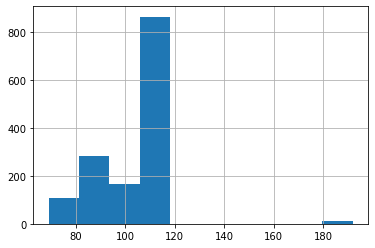

In [16]:
DATA['HP'].hist()

<AxesSubplot:>

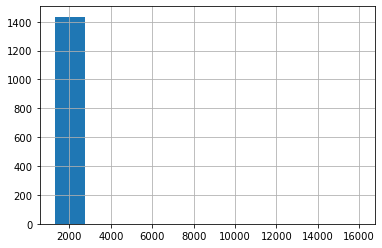

In [17]:
DATA['CC'].hist()

<AxesSubplot:>

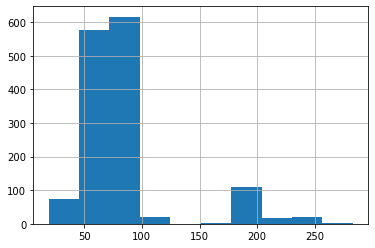

In [18]:
DATA['QT'].hist()

<AxesSubplot:>

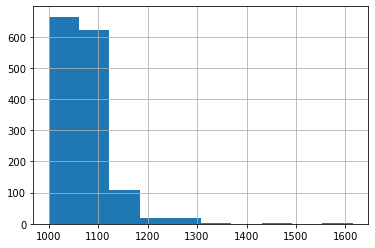

In [19]:
DATA['WT'].hist()


In [20]:
DATA.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


{'whiskers': [<matplotlib.lines.Line2D at 0x1f291ed370>,
 'caps': [<matplotlib.lines.Line2D at 0x1f291eda30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f291defd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f291fb130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f291fb490>],
 'means': []}

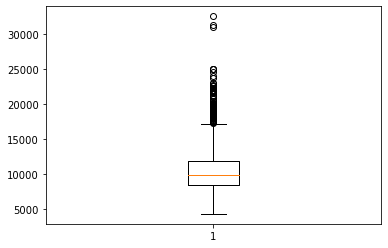

In [21]:
plt.boxplot(DATA['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f28fb2040>,
 'caps': [<matplotlib.lines.Line2D at 0x1f28fc6520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f28f5a4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f28fd9cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f28fe15e0>],
 'means': []}

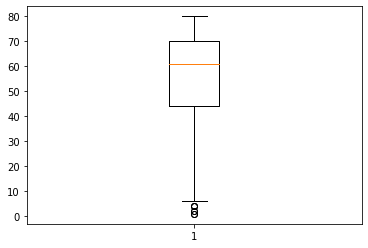

In [22]:
plt.boxplot(DATA['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f2903cb20>,
 'caps': [<matplotlib.lines.Line2D at 0x1f291accd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f2903cf40>],
 'medians': [<matplotlib.lines.Line2D at 0x1f29033c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f28f56b80>],
 'means': []}

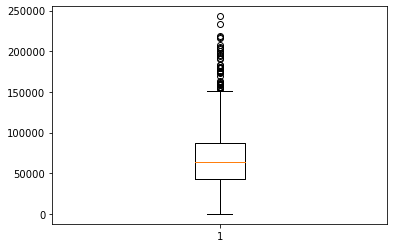

In [23]:
plt.boxplot(DATA['KM'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f292f2be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f292fe2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f292f2880>],
 'medians': [<matplotlib.lines.Line2D at 0x1f292fe9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f292fed00>],
 'means': []}

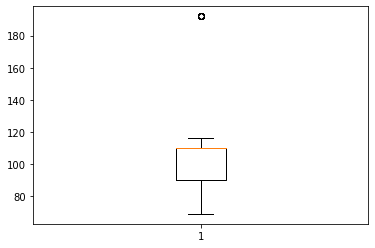

In [24]:
plt.boxplot(DATA['HP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f293551c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f29355880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f29348e20>],
 'medians': [<matplotlib.lines.Line2D at 0x1f29355f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f293622e0>],
 'means': []}

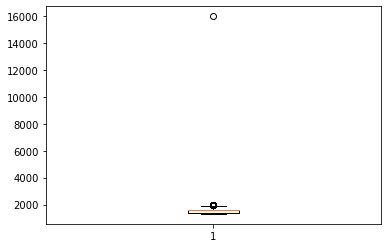

In [25]:
plt.boxplot(DATA['CC'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f293b62b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f293b6970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f293a8f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1f293c2070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f293c23d0>],
 'means': []}

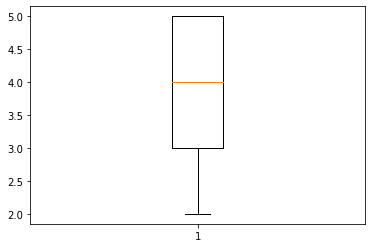

In [26]:
plt.boxplot(DATA['Doors'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f2940ae20>,
 'caps': [<matplotlib.lines.Line2D at 0x1f29418520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f2940aac0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f29418be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f29418f40>],
 'means': []}

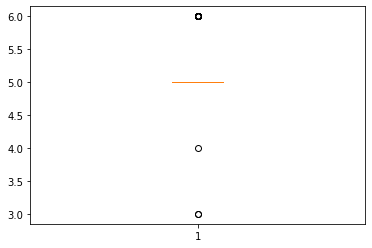

In [27]:
plt.boxplot(DATA['Gears'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f2984b910>,
 'caps': [<matplotlib.lines.Line2D at 0x1f29859040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f2984b5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f29859700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f29859a60>],
 'means': []}

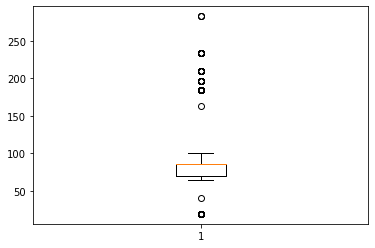

In [28]:
plt.boxplot(DATA['QT'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f298a6970>,
 'caps': [<matplotlib.lines.Line2D at 0x1f298b1070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f298a6610>],
 'medians': [<matplotlib.lines.Line2D at 0x1f298b1730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f298b1a90>],
 'means': []}

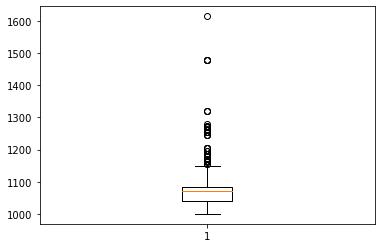

In [29]:
plt.boxplot(DATA['WT'])

In [30]:
DATA.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
WT,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [31]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=DATA).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        10:23:17   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
CC            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
WT            16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## CC and Doors are insignificant

In [33]:
DATA1=DATA.copy()

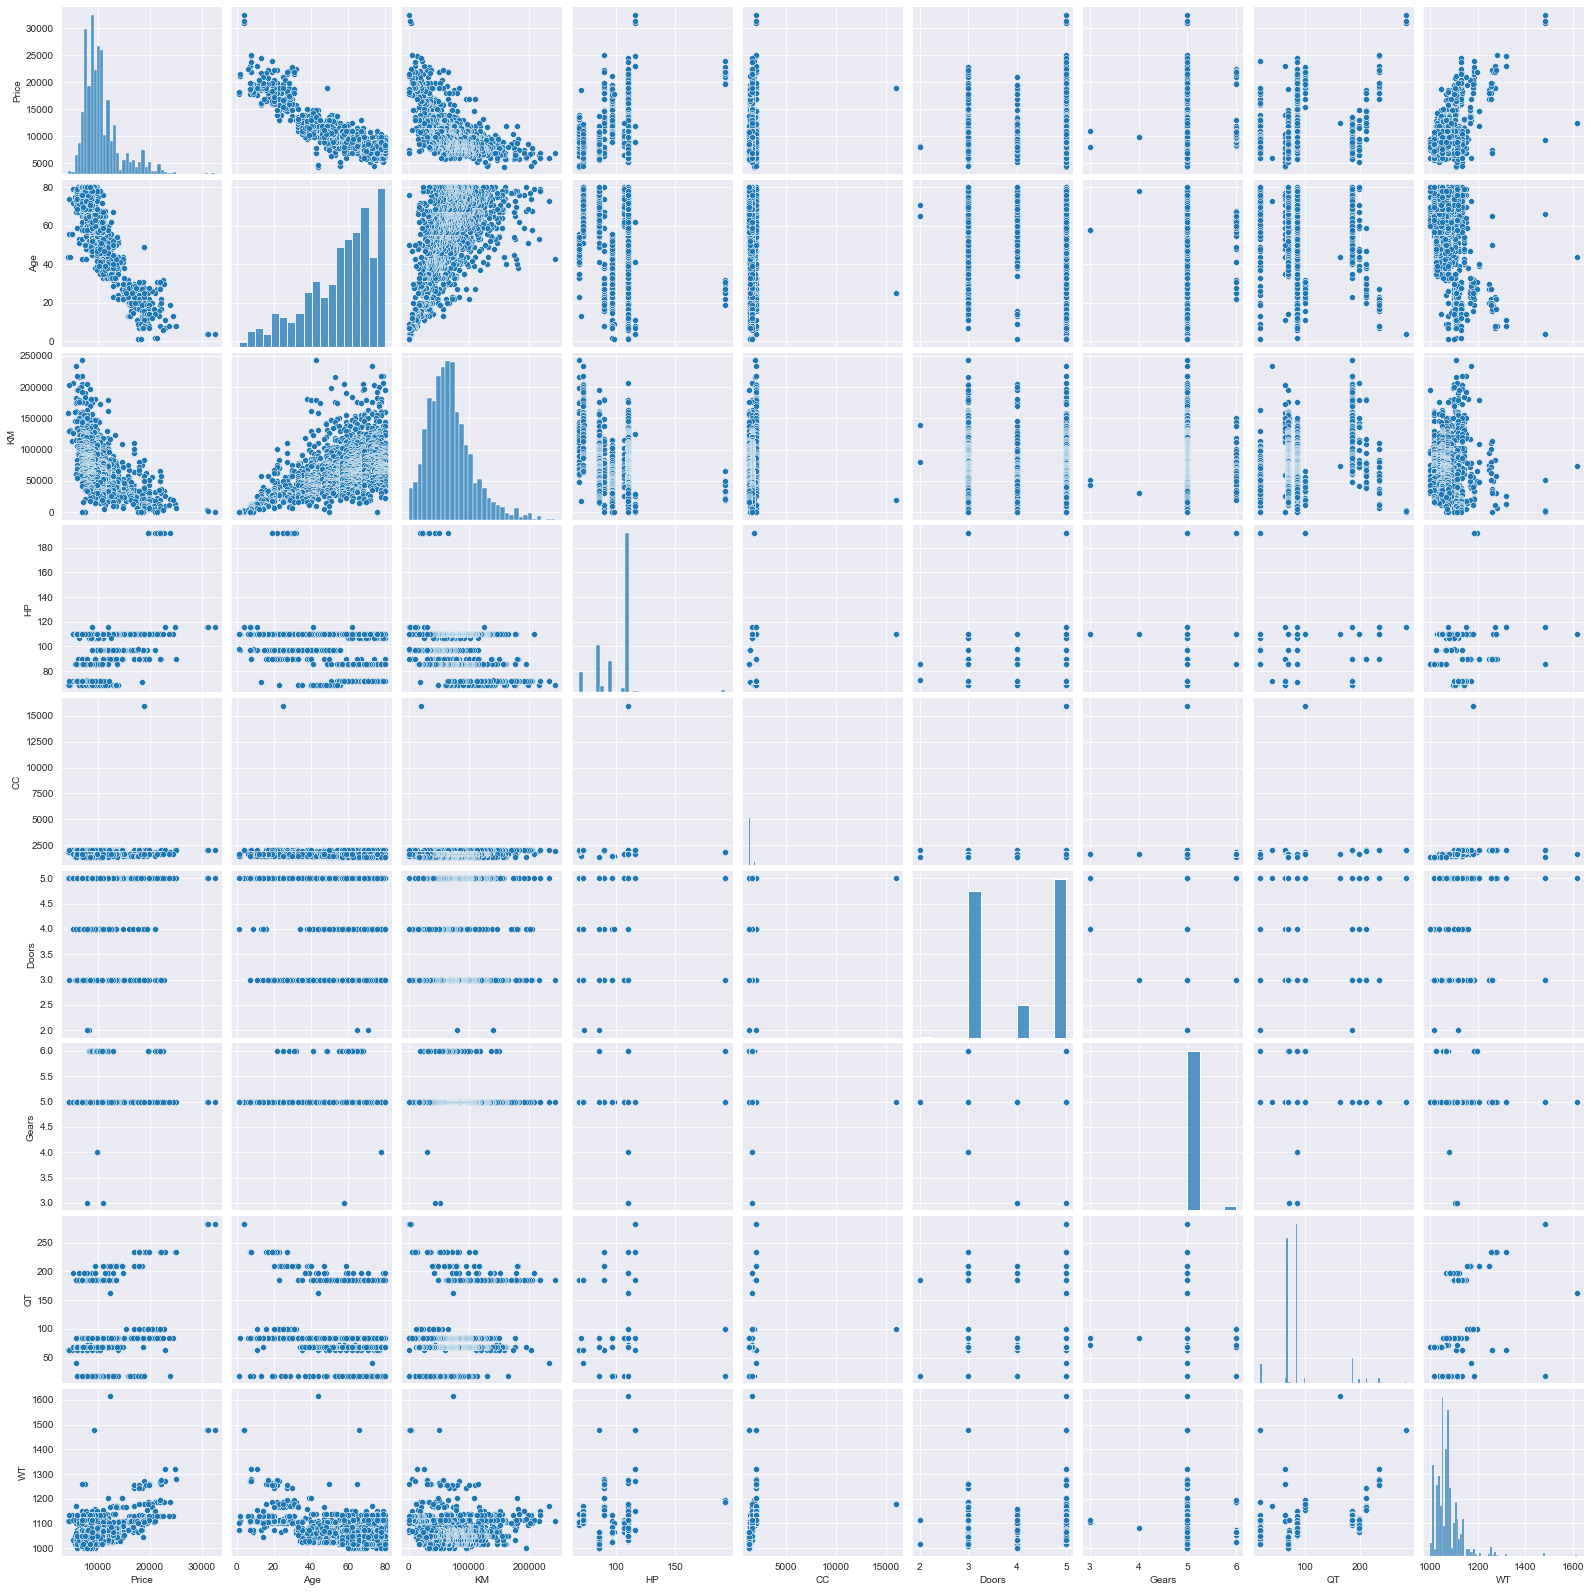

In [34]:
sns.set_style(style='darkgrid')
sns.pairplot(DATA)

In [35]:
#Cofficients(beta 0 beta 1 and so on)
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
WT             16.958632
dtype: float64

In [36]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -3.948666
Age         -46.511852
KM          -16.621622
HP           11.241018
CC           -1.344222
Doors        -0.040410
Gears         3.016007
QT            3.014535
WT           15.879803
dtype: float64 
 Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
CC            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
QT            2.619148e-03
WT            2.048576e-52
dtype: float64


In [37]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

## Building on simple regression model for CC and Doors

In [38]:
M1_CC=smf.ols('Price~CC',data=DATA).fit()
#T and P values
print(M1_CC.tvalues,M1_CC.pvalues)

Intercept    24.694090
CC            4.824822
dtype: float64 Intercept    1.766912e-112
CC            1.550808e-06
dtype: float64


### CC is significant

In [39]:
M1_D=smf.ols('Price~Doors',data=DATA).fit()
#T and P values
print(M1_D.tvalues,M1_D.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


### Doors is also significant

In [40]:
#Combined model for CC and Doors
M1_CD=smf.ols('Price~CC+Doors',data=DATA).fit()
#T and P values
print(M1_CD.tvalues,M1_CD.pvalues)

Intercept    12.620704
CC            4.340400
Doors         6.816153
dtype: float64 Intercept    1.056885e-34
CC           1.521992e-05
Doors        1.373469e-11
dtype: float64


### Both are significiant

In [41]:
# Calculating VIF
rsq_A=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+WT', data =DATA).fit().rsquared
vif_A=1/(1-rsq_A)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+WT', data =DATA).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+WT', data =DATA).fit().rsquared
vif_HP =1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+WT', data =DATA).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_D=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+WT', data =DATA).fit().rsquared
vif_D=1/(1-rsq_D)

rsq_G=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+WT', data =DATA).fit().rsquared
vif_G=1/(1-rsq_G)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+WT', data =DATA).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('WT~Age+KM+HP+CC+Doors+Gears+QT', data =DATA).fit().rsquared
vif_WT=1/(1-rsq_WT)

In [42]:
D1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','WT'],'VIF': [vif_A,vif_KM,vif_HP,vif_CC,vif_D,vif_G,vif_QT,vif_WT]}
vif_frame = pd.DataFrame(D1)
vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,WT,2.516420


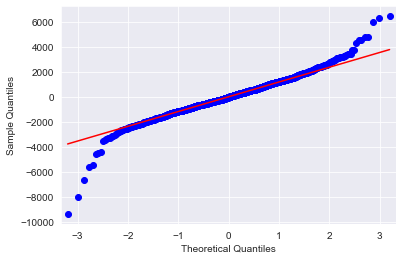

In [43]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.show()

In [44]:
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

In [45]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

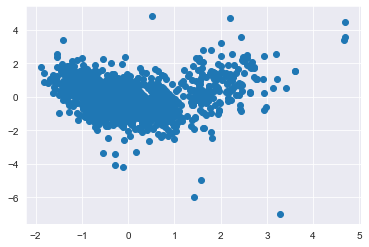

In [46]:
def get_standardized_values (vals):
    return (vals-vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.show()

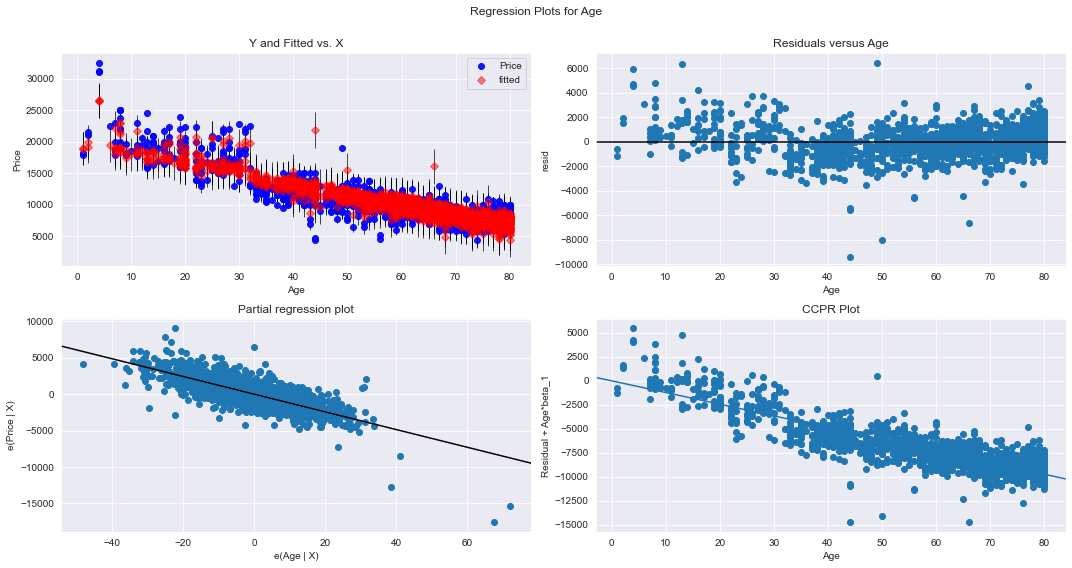

In [47]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Age',fig=fig)

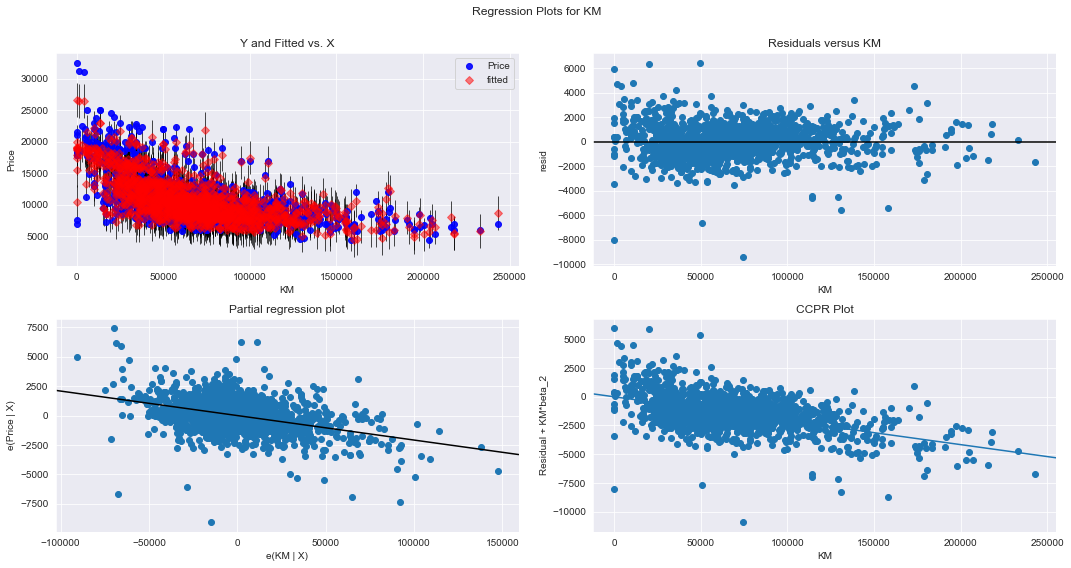

In [48]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)

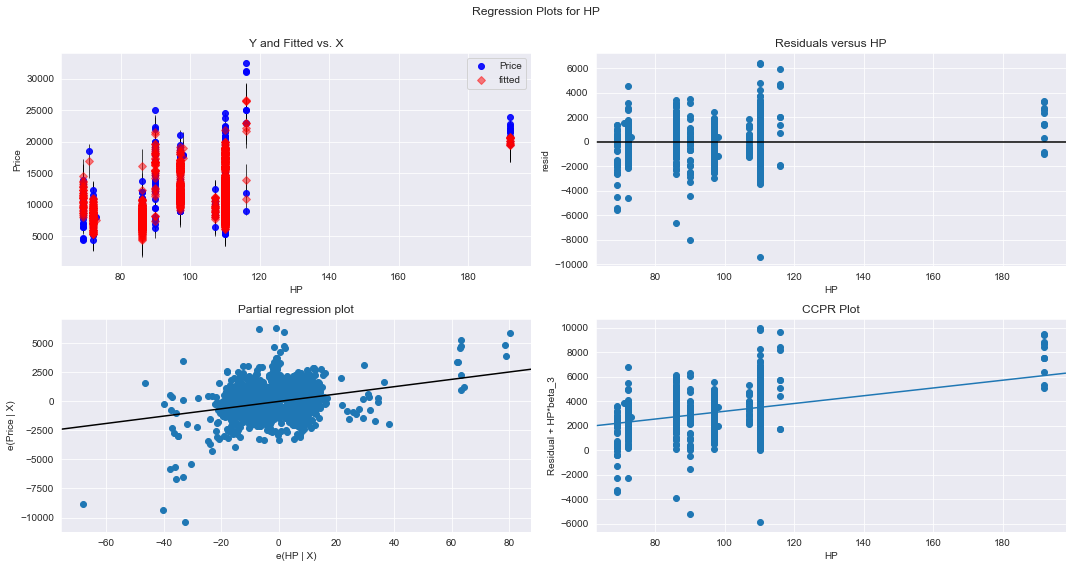

In [49]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)

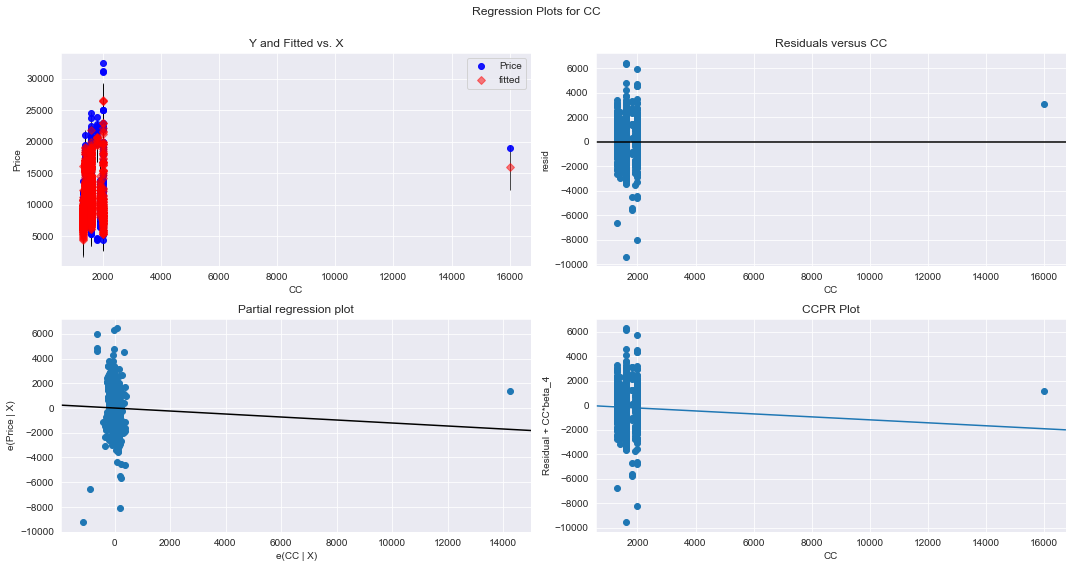

In [50]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'CC',fig=fig)

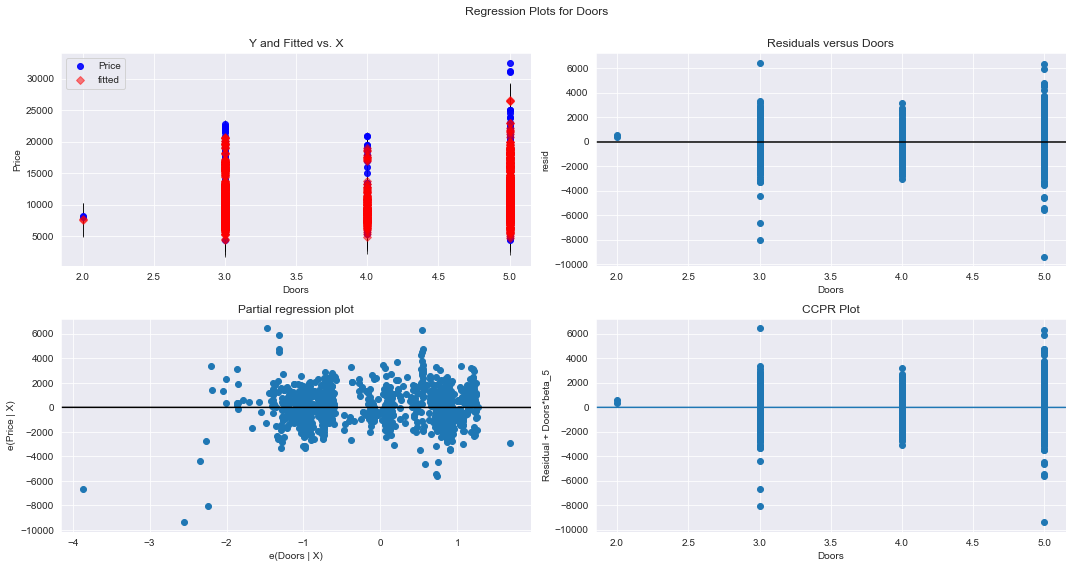

In [51]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Doors',fig=fig)

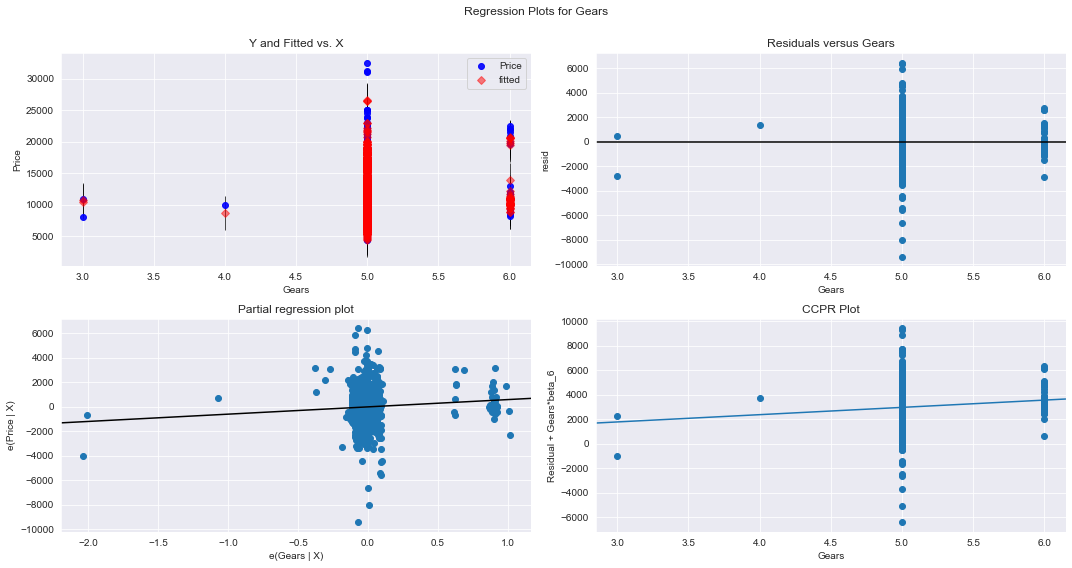

In [52]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)

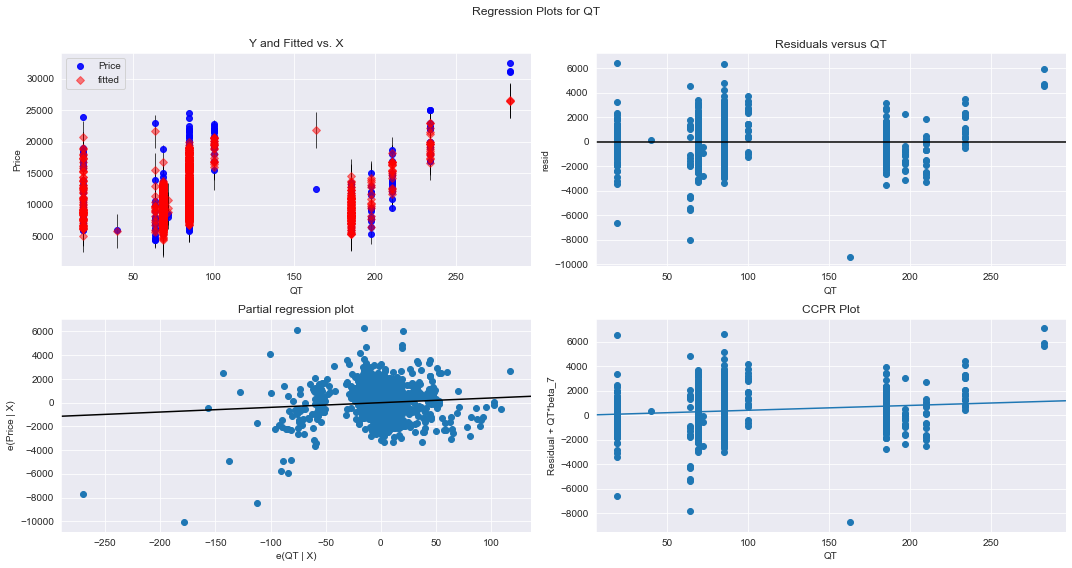

In [53]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'QT',fig=fig)

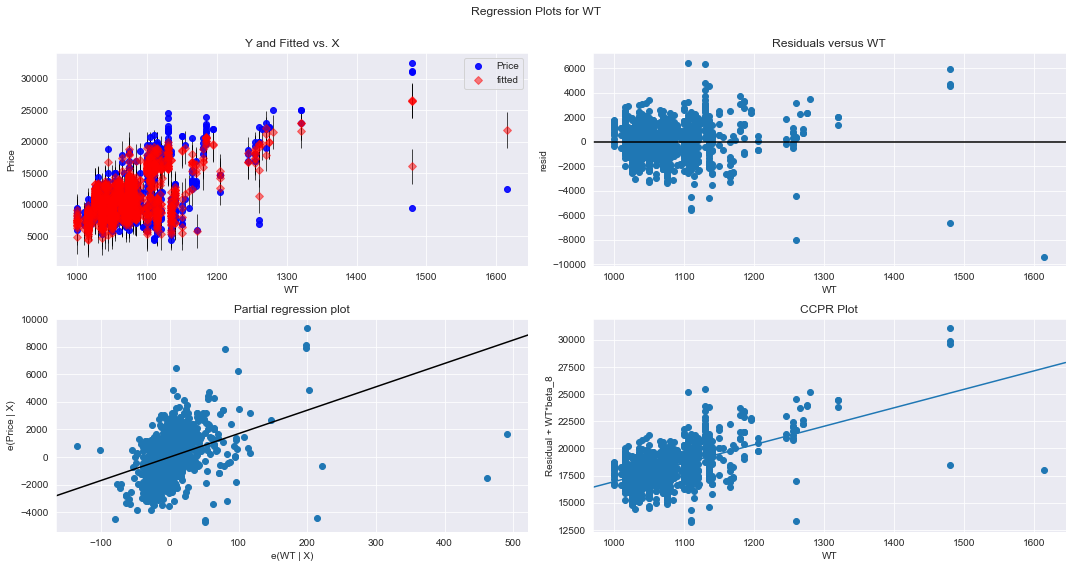

In [54]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'WT',fig=fig)

# Detecting Influencers/Outliers

# Cook Distance

<StemContainer object of 3 artists>

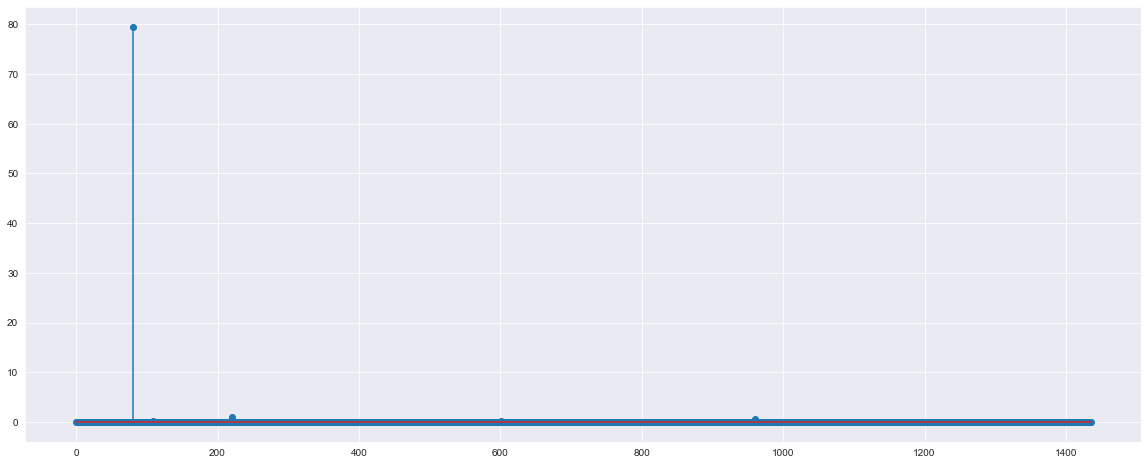

In [55]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
fig=plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(DATA)),np.round(c,3))

In [56]:
(np.argmax(c),np.max(c))

(80, 79.5201062414142)

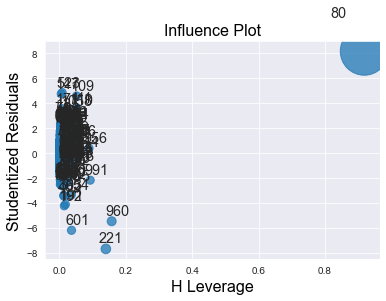

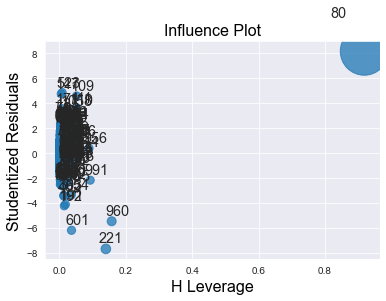

In [57]:
sm.graphics.influence_plot(model)

## Improving the model where high infulence points are present.

In [58]:
# Removing 80 and checking for significance
Data1=DATA.drop(DATA.index[[80]])

In [59]:
Data1.shape

(1435, 9)

In [60]:
model1=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=Data1).fit()

In [61]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        10:26:21   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age         -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM            -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP            39.3463      2.911     13.516      0.000      33.636      45.057
CC            -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors        -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears        523.9416    192.865      2.717      0.007     145.612     902.271
QT             9.0440      1.425      6.348      0.000       6.249      11.839
WT            20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Doors is insignificant

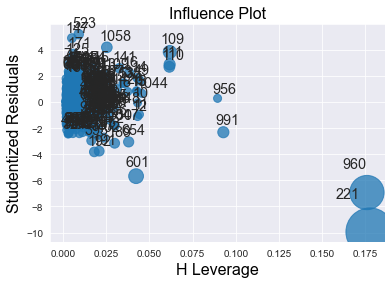

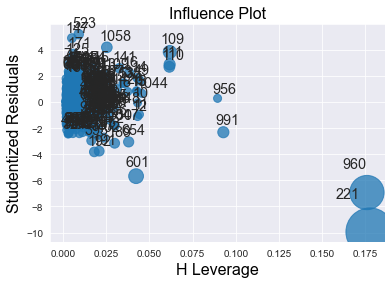

In [62]:
sm.graphics.influence_plot(model1)

In [63]:
# Removing 80 and 221, where 221 is the next most influencing index.
Data2=DATA.drop(DATA.index[[80,221]])

In [64]:
Data2.shape

(1434, 9)

In [65]:
model2=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=Data2).fit()

In [66]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1280.
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        10:26:49   Log-Likelihood:                -12278.
No. Observations:                1434   AIC:                         2.457e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.025e+04   1395.733     -7.346      0.000    -1.3e+04   -7514.512
Age         -116.5783      2.508    -46.475      0.000    -121.499    -111.658
KM            -0.0173      0.001    -13.966      0.000      -0.020      -0.015
HP            39.2932      2.816     13.953      0.000      33.769      44.817
CC            -3.2057      0.305    -10.511      0.000      -3.804      -2.607
Doors        -65.3718     38.152     -1.713      0.087    -140.212       9.468
Gears        485.0462    186.602      2.599      0.009     119.001     851.091
QT             7.9664      1.382      5.762      0.000       5.254      10.678
WT            25.0494      1.186     21.129      0.000      22.724      27.375
==============================================================================
Omnibus:                      197.976   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.342
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Doors is still insignificant

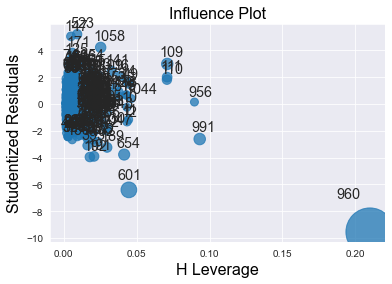

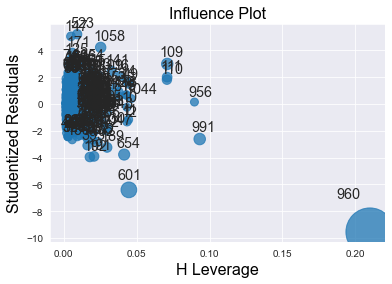

In [67]:
sm.graphics.influence_plot(model2)

In [68]:
# Removing 80,221,960, where 960 is the next most influencing index after 80,221.
Data3=DATA.drop(DATA.index[[80,221,960]])

In [69]:
Data3.shape

(1433, 9)

In [70]:
model3=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=Data3).fit()

In [71]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        10:27:23   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age         -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM            -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP            36.6084      2.745     13.334      0.000      31.223      41.994
CC            -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors       -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears        464.9839    180.976      2.569      0.010     109.975     819.993
QT             5.2134      1.371      3.802      0.000       2.523       7.904
WT            30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
## As all the vaiables are significant, we select it as the final model

In [73]:
finalmodel = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+WT", data =Data3).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        10:27:24   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age         -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM            -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP            36.6084      2.745     13.334      0.000      31.223      41.994
CC            -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors       -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears        464.9839    180.976      2.569      0.010     109.975     819.993
QT             5.2134      1.371      3.802      0.000       2.523       7.904
WT            30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
## prediction
pred_data=pd.DataFrame(Data3)
Final_pred=finalmodel.predict(pred_data)

In [78]:
D={"Real Value":DATA["Price"],"finalmodel":Final_pred} 

In [79]:
Result_frame=pd.DataFrame(D)

In [80]:
Result_frame

,Real Value,finalmodel
0,13500,16333.273814
1,13750,15892.326850
2,13950,16310.886081
3,14950,15979.990390
4,13750,15846.536733
...,...,...
1431,7500,9115.435074
1432,10845,8499.218117
1433,8500,8644.947302
1434,7250,8758.664462
